In [1]:
#!pip install prophet
import pandas as pd
from prophet import Prophet

In [2]:
df=pd.read_excel(r'/Users/radhikagarg/Desktop/TP TERM 3/TP/data/Cardano.xlsx',sheet_name='cardano_2018')
df.tail()

,ds,y
1156,2021-03-02,1.224643
1157,2021-03-03,1.214324
1158,2021-03-04,1.112490
1159,2021-03-05,1.158227
1160,2021-03-06,1.129016


In [3]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365*2)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1886,2023-03-02,2.572232,1.694986,3.425194
1887,2023-03-03,2.568441,1.662402,3.443979
1888,2023-03-04,2.565750,1.637592,3.456499
1889,2023-03-05,2.553452,1.635805,3.437513
1890,2023-03-06,2.544785,1.648440,3.402036


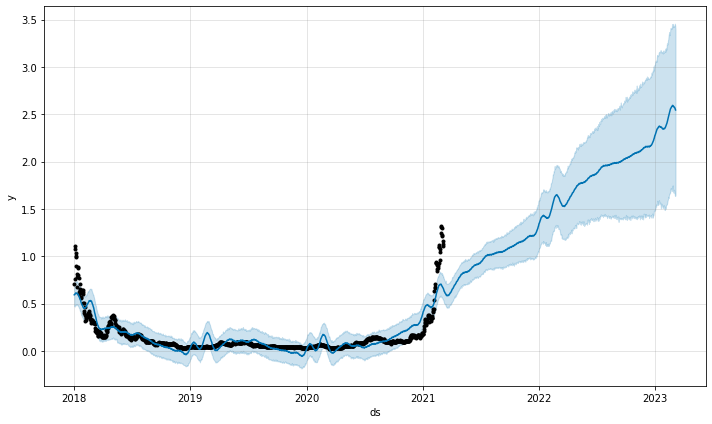

In [9]:
fig1 = m.plot(forecast)

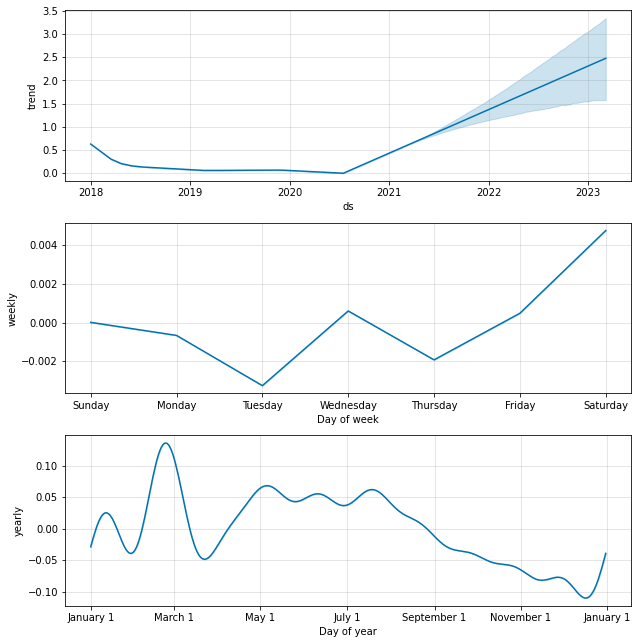

In [10]:
fig2 = m.plot_components(forecast)

In [30]:
#!pip install plotly==4.0

In [11]:
from prophet.plot import plot_plotly, plot_components_plotly
#!pip install ipywidgets
plot_plotly(m, forecast)

In [12]:
plot_components_plotly(m, forecast)

In [13]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
1886,2023-03-02,2.572232,NaN
1887,2023-03-03,2.568441,NaN
1888,2023-03-04,2.565750,NaN
1889,2023-03-05,2.553452,NaN
1890,2023-03-06,2.544785,NaN


In [14]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
1156,2021-03-02,0.682301,1.224643
1157,2021-03-03,0.679558,1.214324
1158,2021-03-04,0.669754,1.112490
1159,2021-03-05,0.664361,1.158227
1160,2021-03-06,0.660485,1.129016


In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

r2_score(metric_df.y, metric_df.yhat)

0.7551496919997396

In [16]:
mean_squared_error(metric_df.y, metric_df.yhat)

0.00931070245049022

In [17]:
mean_absolute_error(metric_df.y, metric_df.yhat)

0.06257987114662855